In [1]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
path = "./Predictions_3_files/"

In [2]:
overAllDict = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)
            
            for stuff in lines[1:]:


                for thing in stuff:
                    thingie = thing.split("\t") # split by tabs to get columns
                    if len(keys) != len(thingie):
                        print(sentID,thingie)
                    else:
                        _List = [int(thingie[0])]
                        _List.append(int(thingie[-4]))
                        _List.append(thingie[-3])
                        _List.append(int(thingie[-2]))
                        _List.append(thingie[-1])
                    
                        sentDicts.append(_List)
                        
                sentID += 1
            overAllDict[item][filName.split(".")[0]] = sentDicts

./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/L2S/poetry.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/L2S/Test.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
1001 ['']
./Predictions_3_files/yap/prose.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/yap/poetry.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/yap/Test.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
1001 ['']
./Predictions_3_files/DCST/poetry_final.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head

In [3]:
depDisttDictUnLab = defaultdict(dict)
depDisttDictLab = defaultdict(dict)
for item in overAllDict:
    for thing in overAllDict[item]:
        for stuff in overAllDict[item][thing]:
            #print(item+"_"+thing, stuff[1], stuff[3], stuff[1]-stuff[3])
            if stuff[1] == stuff[3]:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                if stuff[2] == stuff[4]:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1) 
                else:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                    
            else:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)

                try:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                except KeyError:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)

In [4]:
resList = list()
for item in depDisttDictUnLab:
    for stuff in depDisttDictUnLab[item]:
        thing = depDisttDictUnLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])
        

<Figure size 432x288 with 0 Axes>

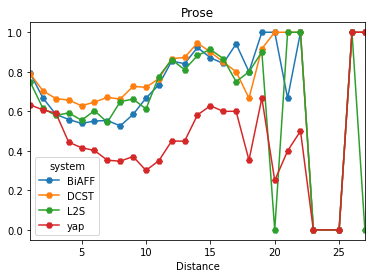

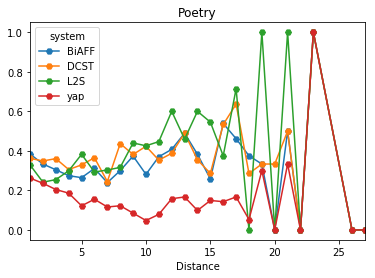

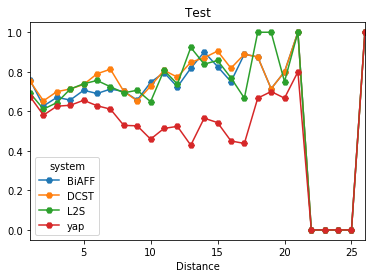

In [34]:
distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[(distPD["setting"] == item) ][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore").fillna(0)
    plotPD.plot(marker='H',title=item.title())

In [33]:
plotPD.fillna(0)

system,BiAFF,DCST,L2S,yap
Distance,,,,
1,0.383766,0.361981,0.328595,0.262055
2,0.333333,0.348958,0.241491,0.235772
3,0.304225,0.360656,0.254491,0.204301
4,0.274368,0.305439,0.299020,0.186047
5,0.264423,0.329032,0.382353,0.121951
6,0.310976,0.365079,0.293103,0.155172
7,0.239316,0.244898,0.303030,0.116071
8,0.300000,0.436620,0.316456,0.122222
9,0.373626,0.381579,0.440000,0.084906


In [6]:
resList = list()
for item in depDisttDictLab:
    for stuff in depDisttDictLab[item]:
        thing = depDisttDictLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

<Figure size 432x288 with 0 Axes>

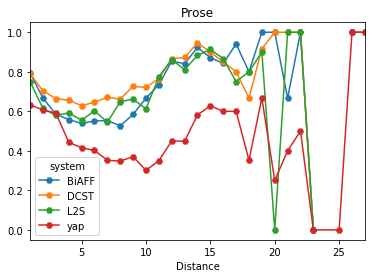

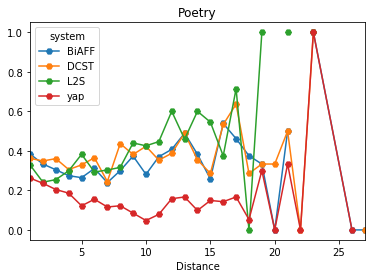

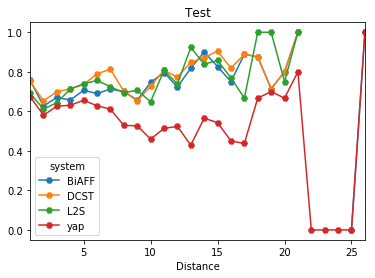

In [7]:
distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    plotPD.plot(marker='H',title=item.title())

In [35]:
rootDef = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            rootDist = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)

            for stuff in lines[1:-1]:
                tempSent = [thing.split("\t") for thing in stuff]

                for thing in tempSent:
                    try:
                        _path = [int(thing[0])]
                        startNode = int(thing[0])
                        termNode = int(thing[0])
                        
                    except ValueError:
                        print(thing[0],thing)
                        
   
                    while termNode != 0:
                        try:
                            if termNode == int(tempSent[termNode - 1][-4]):
                                _path = list()
                                break
        
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break

                        if len(tempSent) < len(_path):
                            print(len(tempSent), len(_path), _path, tempSent[0])
                            _path = list()
                            break
                        try:
                            termNode = int(tempSent[termNode - 1][-4])
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break
                            
                        
                        
                        
                        _path.append(termNode)
                    if thing[-4] == thing[-2]:
                        _path.append(True)
                        if thing[-3] == thing[-1]:
                            _path.append(True)
                        else:
                            _path.append(False)

                    else:
                        _path.append(False)
                        _path.append(False)

                    rootDist.append(_path)
            rootDef[item][filName.split(".")[0]] = rootDist            


./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
11 12 [1, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [2, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [3, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [4, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [6, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [7, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axi

11 12 [1, 9, 7, 1, 9, 7, 1, 9, 7, 1, 9, 7] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11', 'sambanxah']
11 12 [2, 7, 1, 9, 7, 1, 9, 7, 1, 9, 7, 1] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11', 'sambanxah']
11 12 [3, 2, 7, 1, 9, 7, 1, 9, 7, 1, 9, 7] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11', 'sambanxah']
11 12 [4, 7, 1, 9, 7, 1, 9, 7, 1, 9, 7, 1] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11', 'sambanxah']
11 12 [5, 2, 7, 1, 9, 7, 1, 9, 7, 1, 9, 7] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11', 'sambanxah']
11 12 [6, 7, 1, 9, 7, 1, 9, 7, 1, 9, 7, 1] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11', 'sambanxah']
11 12 [7, 1, 9, 7, 1, 9, 7, 1, 9, 7, 1, 9] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11', 'sambanxah']
11 12 [8, 7, 1, 9, 7, 1, 9, 7, 1, 9, 7, 1] ['1', 'iti', 'iti', 'ind.', 'ind.', 'tense=ind', '9', 'anuyogi', '11

13 14 [10, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11] ['1', 'ambumucaH', 'nom. pl. m.', 'ambu-muc', '11', 'karwa', '11', 'karwa']
13 14 [11, 12, 13, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11, 12] ['1', 'ambumucaH', 'nom. pl. m.', 'ambu-muc', '11', 'karwa', '11', 'karwa']
13 14 [12, 13, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11, 12, 13] ['1', 'ambumucaH', 'nom. pl. m.', 'ambu-muc', '11', 'karwa', '11', 'karwa']
13 14 [13, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11] ['1', 'ambumucaH', 'nom. pl. m.', 'ambu-muc', '11', 'karwa', '11', 'karwa']
18 19 [11, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18] ['1', 'vayasya', 'voc. sg. m.', 'vayasya', '2', 'prawiyogi', '2', 'prawiyogi']
18 19 [12, 13, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18] ['1', 'vayasya', 'voc. sg. m.', 'vayasya', '2', 'prawiyogi', '2', 'prawiyogi']
18 19 [13, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16, 17, 18, 16] ['1', 'vayasya', 'voc. sg. m.', 'vaya

11 12 [1, 4, 11, 8, 9, 4, 11, 8, 9, 4, 11, 8] ['1', 'ruciracitratanUruhaSaaliBiH', 'i. pl. m.', 'ruciracitratanUruhaSa-ali', '4', 'viseranam', '6', 'hewuh']
11 12 [2, 4, 11, 8, 9, 4, 11, 8, 9, 4, 11, 8] ['1', 'ruciracitratanUruhaSaaliBiH', 'i. pl. m.', 'ruciracitratanUruhaSa-ali', '4', 'viseranam', '6', 'hewuh']
11 12 [4, 11, 8, 9, 4, 11, 8, 9, 4, 11, 8, 9] ['1', 'ruciracitratanUruhaSaaliBiH', 'i. pl. m.', 'ruciracitratanUruhaSa-ali', '4', 'viseranam', '6', 'hewuh']
11 12 [5, 8, 9, 4, 11, 8, 9, 4, 11, 8, 9, 4] ['1', 'ruciracitratanUruhaSaaliBiH', 'i. pl. m.', 'ruciracitratanUruhaSa-ali', '4', 'viseranam', '6', 'hewuh']
11 12 [8, 9, 4, 11, 8, 9, 4, 11, 8, 9, 4, 11] ['1', 'ruciracitratanUruhaSaaliBiH', 'i. pl. m.', 'ruciracitratanUruhaSa-ali', '4', 'viseranam', '6', 'hewuh']
11 12 [9, 4, 11, 8, 9, 4, 11, 8, 9, 4, 11, 8] ['1', 'ruciracitratanUruhaSaaliBiH', 'i. pl. m.', 'ruciracitratanUruhaSa-ali', '4', 'viseranam', '6', 'hewuh']
11 12 [11, 8, 9, 4, 11, 8, 9, 4, 11, 8, 9, 4] ['1', 'rucira

In [38]:
totListUnLab = defaultdict(dict)
totListLab = defaultdict(dict)
for item in rootDef:
    for stuff in rootDef[item]:
        countr = 0
        for thing in rootDef[item][stuff]:
            if len(thing) >= 3:
                if thing[-2] == True:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                if thing[-1] == True:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                
                
            else:
                countr +=1
        print(item,stuff,countr, len(rootDef[item][stuff]))

L2S prose 150 3706
L2S poetry 144 3706
L2S Test 0 6895
yap prose 150 3706
yap poetry 144 3706
yap Test 0 6895
DCST poetry_final 144 3706
DCST prose_final 150 3706
DCST Test 0 6895
BiAFF poetry_final 144 3706
BiAFF prose_final 150 3706
BiAFF Test 0 6895


In [42]:
unDF = list()
for item in totListUnLab:
    for stuff in totListUnLab[item]:
        thing = totListUnLab[item][stuff]
        unDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

<Figure size 432x288 with 0 Axes>

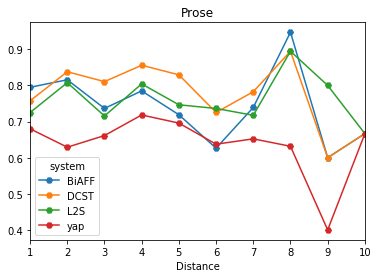

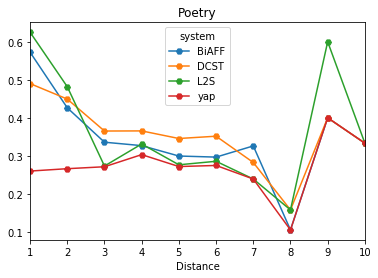

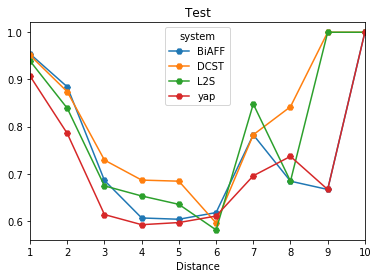

In [44]:
distPD = pd.DataFrame.from_records(unDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    plotPD.plot(marker='H',title=item.title())

In [46]:
labDF = list()
for item in totListLab:
    for stuff in totListLab[item]:
        thing = totListLab[item][stuff]
        labDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

<Figure size 432x288 with 0 Axes>

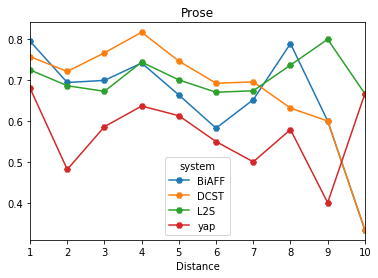

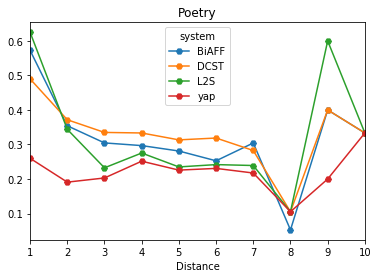

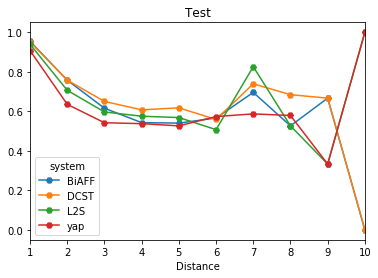

In [47]:
distPD = pd.DataFrame.from_records(labDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
for item in distPD["setting"].unique():

    plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    plotPD.plot(marker='H',title=item.title())